In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:/Users/SHRUTI/OneDrive/Desktop/MLT DATASETS/GOOGL_data.csv")
pd.to_datetime(df['date'])

In [23]:
df 

#this dataset consists of values from the year 2013-2018

,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL
...,...,...,...,...,...,...,...
1254,2018-02-01,1175.9900,1187.4500,1169.3600,1181.5900,3675709,GOOGL
1255,2018-02-02,1127.4200,1131.3000,1111.1700,1119.2000,5892122,GOOGL
1256,2018-02-05,1100.6100,1114.9900,1056.7400,1062.3900,4177469,GOOGL
1257,2018-02-06,1033.9800,1087.3800,1030.0100,1084.4300,3831524,GOOGL


In [15]:
#getting no of rows and columns

df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


(1259, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


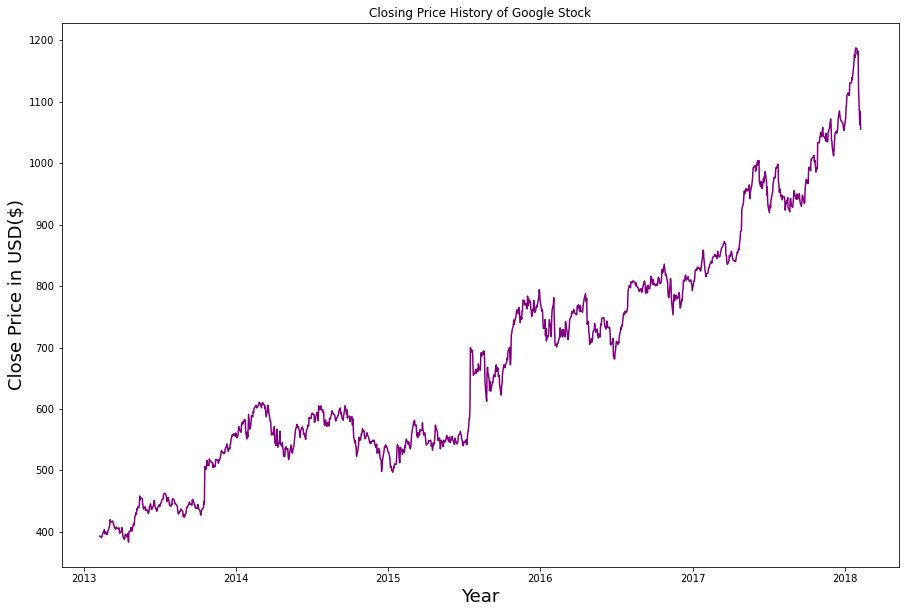

In [22]:
#closing price history

plt.figure(figsize=(15,10))
plt.title("Closing Price History of Google Stock")
x=pd.to_datetime(df['date'])
y=df['close']
plt.plot(x,y, color='purple')
plt.xlabel("Year", fontsize=18)
plt.ylabel("Close Price in USD($)", fontsize=18)
plt.show()

In [24]:
#Googles stock price has been increasing over the years
#Anyone who would have bought the stock between 2013- 2014 and 2015 and 2016 and sold it in 2017 and 2018 it would have been 
#profitable

In [35]:
#Creating a new df with only close 
df_close= df.filter(['close'])
#converting the data to numpy array
ds= df_close.values
training_data= math.ceil (len(ds) * .8) #computing the no of rows we are using 80% and then rounding of the values 
training_data

1008

In [36]:
ds

array([[ 393.0777],
       [ 391.6012],
       [ 390.7403],
       ...,
       [1062.39  ],
       [1084.43  ],
       [1055.41  ]])

In [39]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
scale_data = scaler.fit_transform(ds)
scale_data

array([[0.01210825],
       [0.01027231],
       [0.00920184],
       ...,
       [0.84435851],
       [0.87176395],
       [0.83567929]])

In [43]:
#creating the training dataset 
#create scaled training dataset
data_train=scale_data[0:training_data, :]
#splitting the data into x_train y train 
x_train= []
y_train= []

for i in range(60, len(data_train)):
    x_train.append(data_train[i-60:i, 0])
    y_train.append(data_train[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01210825, 0.01027231, 0.00920184, 0.01054612, 0.01363296,
       0.01678819, 0.02547611, 0.0165206 , 0.01843128, 0.02103268,
       0.0154689 , 0.01507063, 0.0210762 , 0.02195991, 0.0250654 ,
       0.03459601, 0.04523799, 0.04074221, 0.04149897, 0.04082938,
       0.04288304, 0.03839596, 0.03696464, 0.03461839, 0.0301139 ,
       0.02606115, 0.02825806, 0.03036657, 0.02822064, 0.0276295 ,
       0.02721245, 0.02894258, 0.02286849, 0.01759606, 0.02195369,
       0.02932842, 0.02507287, 0.01814491, 0.01066437, 0.00556116,
       0.00730372, 0.01510171, 0.0152324 , 0.01502077, 0.00996742,
       0.01708699, 0.01035948, 0.        , 0.02113215, 0.0212841 ,
       0.02612954, 0.02958606, 0.02687635, 0.02209681, 0.0330749 ,
       0.03650407, 0.03392753, 0.03964065, 0.04966663, 0.05951829])]
[0.05682972321006696]

[array([0.01210825, 0.01027231, 0.00920184, 0.01054612, 0.01363296,
       0.01678819, 0.02547611, 0.0165206 , 0.01843128, 0.02103268,
       0.0154689 , 0.01507063, 0.02

In [44]:
#passthroughs


In [45]:
#converting x_train and y_train to np arrays
x_train, y_train= np.array(x_train), np.array(y_train)

In [46]:
#reshaping the xtrain data
#a lstm model needs the input data to be three dimensional in the form of no of samples, timesteps and features
#here we have only 2d data no of rows and columns see below
x_train.shape


(948, 60)

In [49]:
x_train= np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1)) # this is see above rows=948, 60, no features only 1 ie close
                  

In [50]:
x_train.shape

(948, 60, 1)

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [53]:
#building an lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))#first layer we give it input shape no of time steps and features
model.add(LSTM(50, return_sequences=False)) #we are not adding any layers
model.add(Dense(25)) #dense layer having 25 neurons
model.add(Dense(1)) #last layer with 1 neuron

In [56]:
#compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [68]:
#train the model
model.fit(x_train, y_train, batch_size=32, epochs=4)

Epoch 1/4
30/30 [==============================] - 8s 42ms/step - loss: 7.4894e-04 - accuracy: 0.0000e+00
Epoch 2/4
30/30 [==============================] - 1s 41ms/step - loss: 4.6008e-04 - accuracy: 0.0000e+00
Epoch 3/4
30/30 [==============================] - 1s 42ms/step - loss: 4.3857e-04 - accuracy: 0.0000e+00
Epoch 4/4
30/30 [==============================] - 1s 43ms/step - loss: 4.2728e-04 - accuracy: 0.0000e+00


In [60]:
#creating testing dataset
#creating new array with scaled values from 948 to 1259
data_test = scale_data[training_data-60: , :]
#create x_test, y_test
x_test=[]
y_test = ds[training_data: , : ]#values that we want our model to predict

for i in range(60, len(data_test)):
    x_test.append(data_test[i-60:i, 0])
    

In [61]:
#converting the data to numpy array
x_test= np.array(x_test)

In [62]:
#shaping the data
x_test.shape

(251, 60)

In [63]:
x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
x_test.shape

(251, 60, 1)

In [65]:
#models predicting price values fpr x_test dataset
predictions= model.predict(x_test) # we want this to be same as what we would get in y inverse transform
predictions= scaler.inverse_transform(predictions)#like we are unscaling the values 

In [72]:
#get the rmse its good measure of how accurate the model predicts the response the lower values indicate a good fit
rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

16.84730149713645

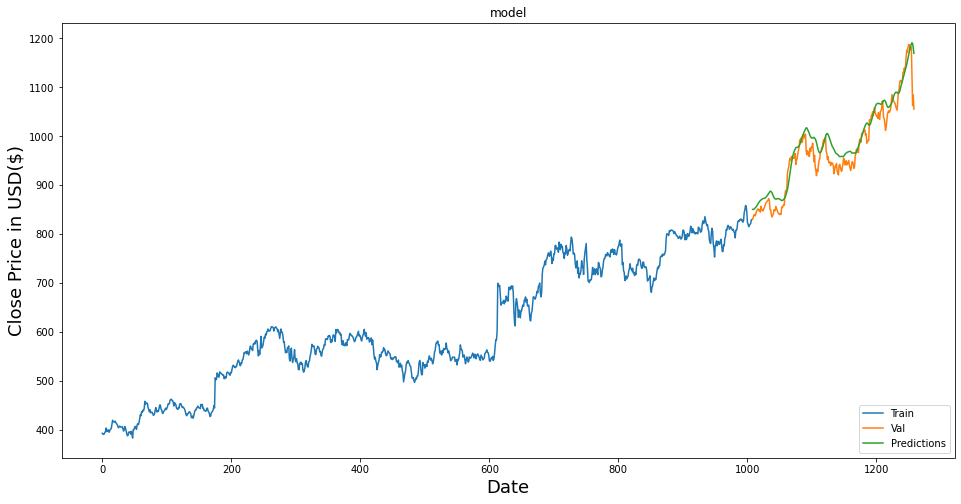

In [80]:
train=df_close[:training_data]
valid=df_close[training_data:]
valid['Predict']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price in USD($)", fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','Predict']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()
    

In [83]:
#the model is predicting pretty decent values not very close but not too far

In [ ]:
#trying to get a quote from the yahoo website

In [88]:
import pandas_datareader as web
google_quote=web.DataReader('GOOG', data_source='yahoo', start='2015-01-01', end='2020-12-12')
new_df = google_quote.filter(['Close'])
#getting the last 60 days and converting df to array
sixty_days= new_df[-60:].values
#scaling data to be between 0 and 1
sixty_day_scaled=scaler.transform(sixty_days)
#create empty lists
X_test=[]
X_test.append(sixty_day_scaled)
X_test=np.array(X_test)
#reshaping
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
#pred
pred_price=model.predict(X_test)
#inverse
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[1675.2368]]


In [93]:
google_quote

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,529.815369,522.665039,527.561584,523.373108,1447563.0,523.373108
2015-01-05,522.894409,511.655243,521.827332,512.463013,2059840.0,512.463013
2015-01-06,514.761719,499.678131,513.589966,500.585632,2899940.0,500.585632
2015-01-07,505.855164,498.281952,505.611847,499.727997,2065054.0,499.727997
2015-01-08,502.101471,489.655640,496.626526,501.303680,3353582.0,501.303680
...,...,...,...,...,...,...
2020-12-07,1832.369995,1805.780029,1819.000000,1819.479980,1320900.0,1819.479980
2020-12-08,1821.900024,1796.204956,1810.099976,1818.550049,1096300.0,1818.550049
2020-12-09,1834.270020,1767.810059,1812.010010,1784.130005,1507600.0,1784.130005


In [94]:
google_quote2=web.DataReader('GOOG', data_source='yahoo', start='2020-12-11', end='2020-12-11')
print(google_quote2)

                   High   Low         Open       Close   Volume   Adj Close
Date                                                                       
2020-12-11  1784.449951  1760  1763.060059  1781.77002  1220700  1781.77002
